In [95]:
from IPython.display import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pprint import pprint
from mlxtend.plotting import plot_confusion_matrix

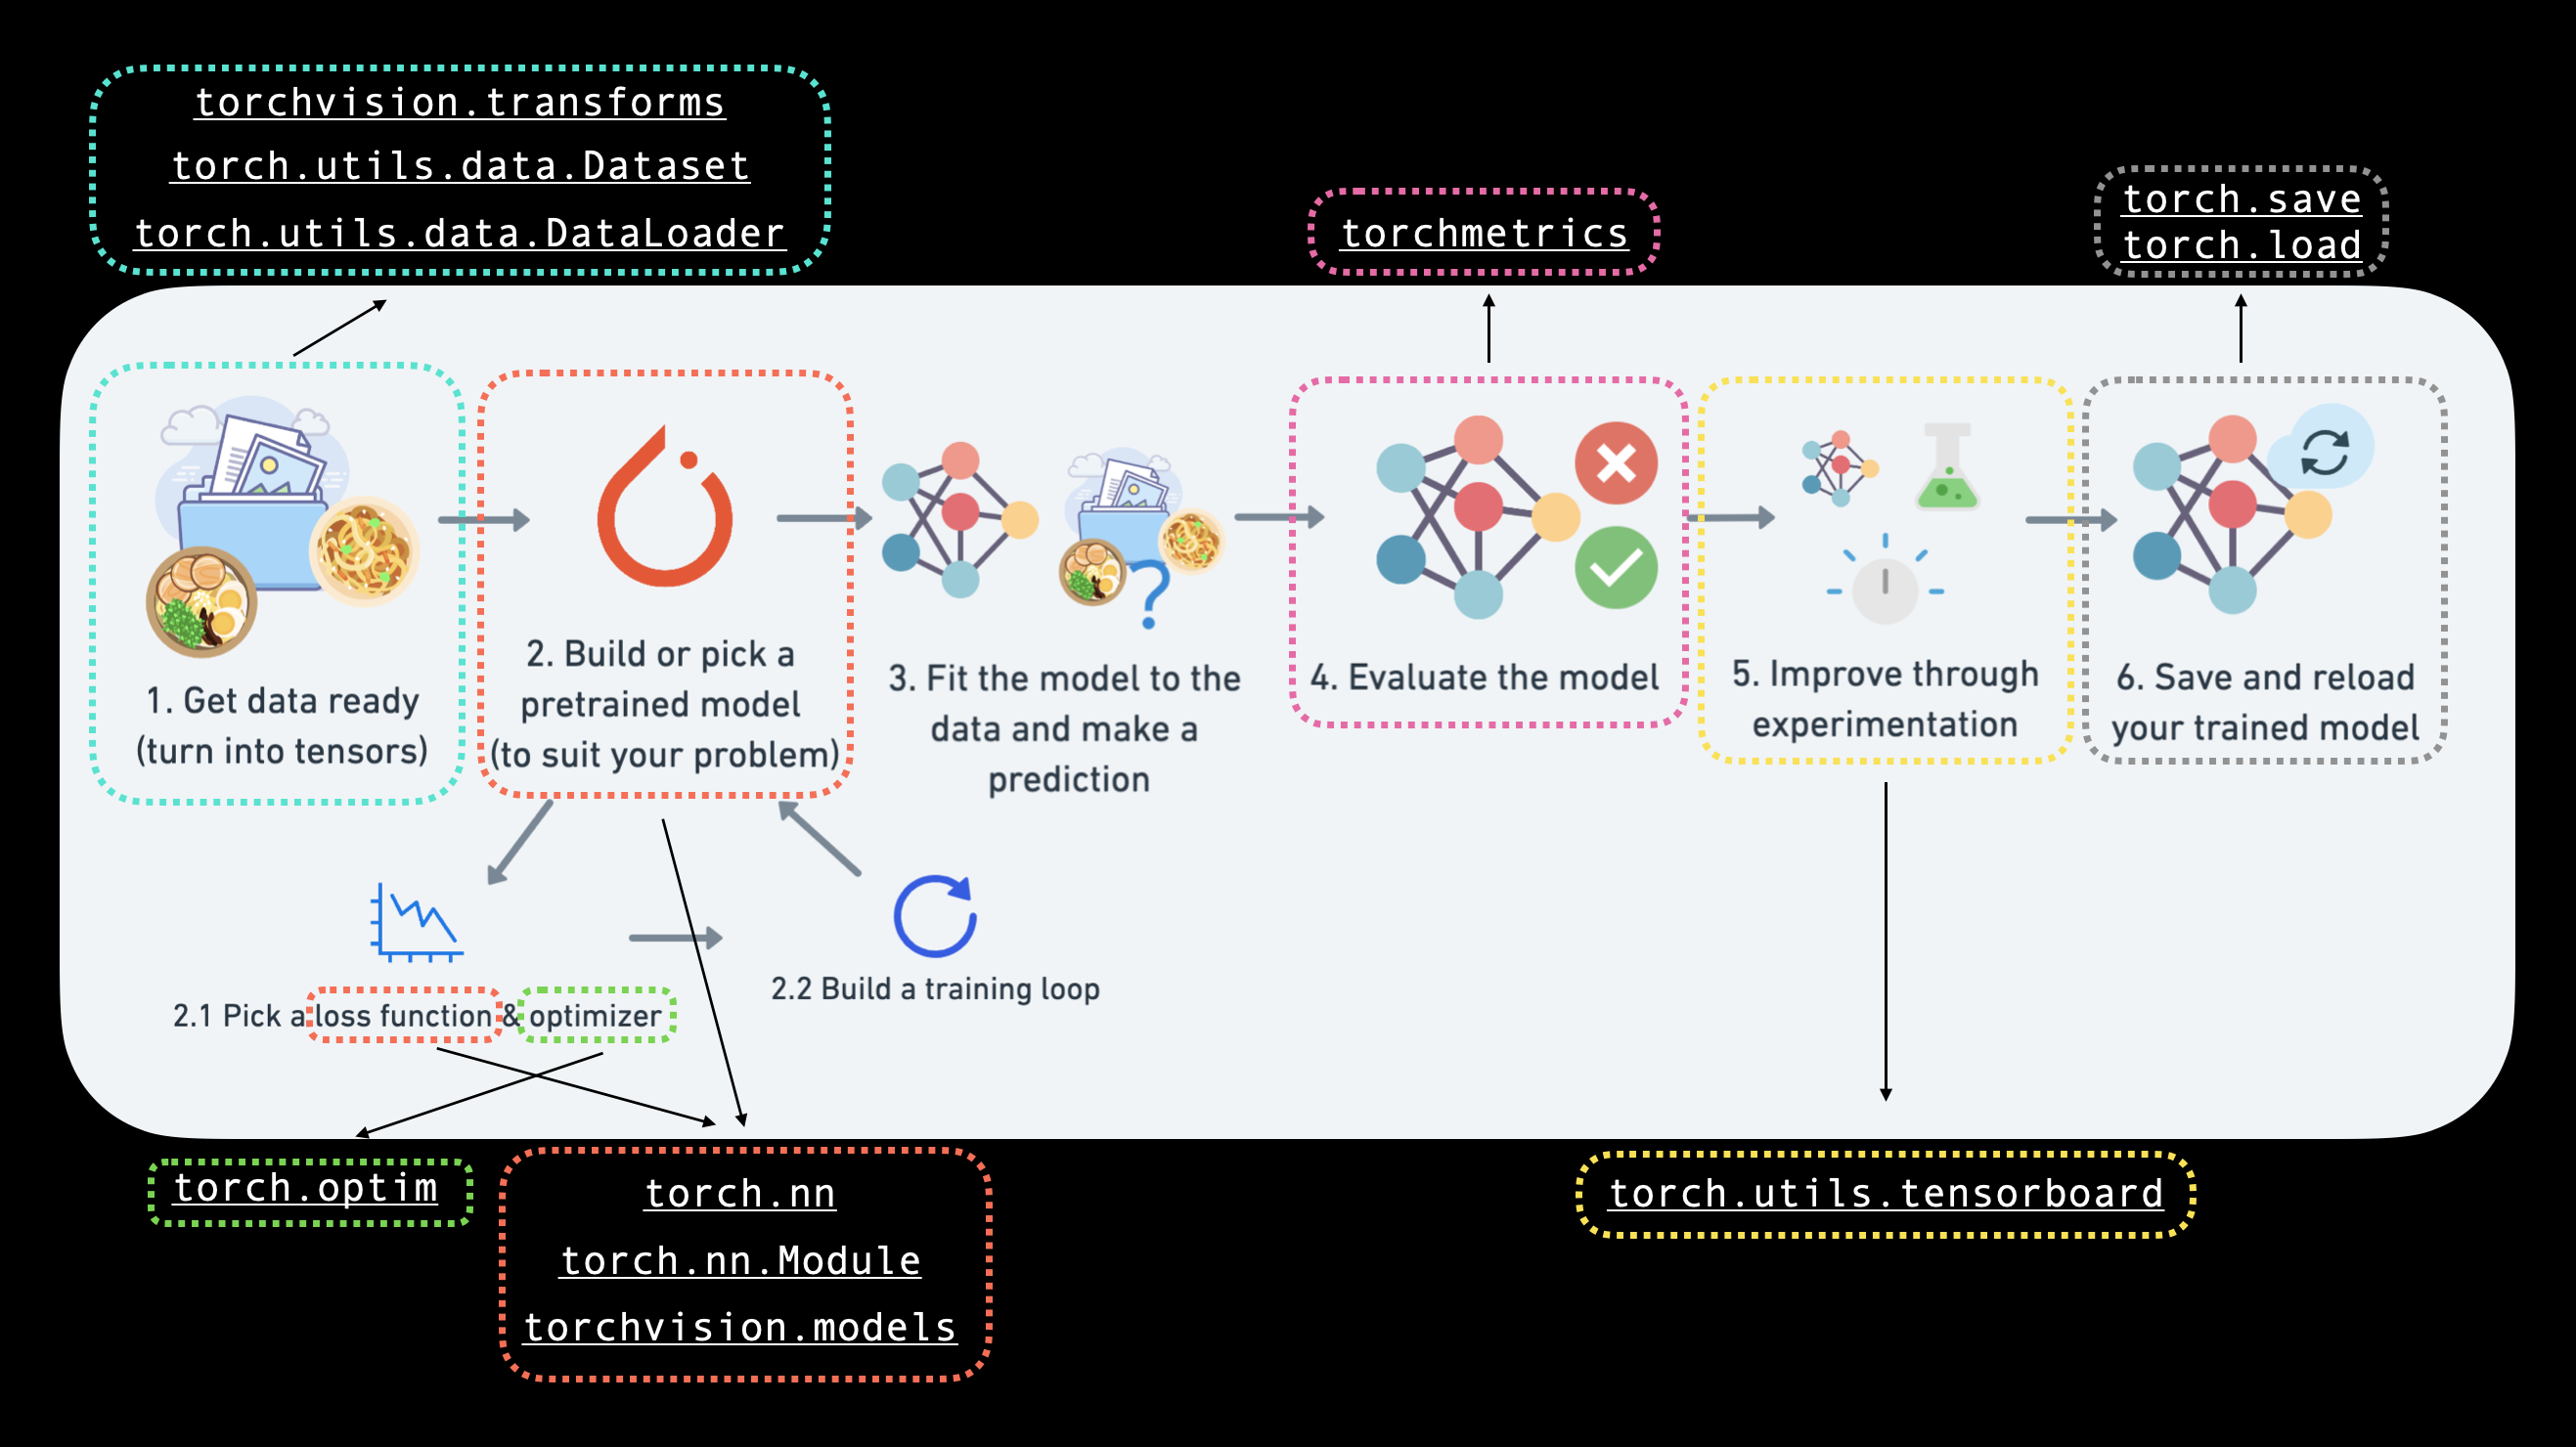

In [2]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png"
Image(image_url, width=800, height=400)


In [3]:
import torch as th
import torchvision as tv
import torchvision.transforms as tvt
import torchmetrics as tm


# Check the torch version
print(th.__version__)


2023-03-01 15:10:55.358952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 15:10:55.553504: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-01 15:10:56.213409: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 15:10:56.213466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

1.13.1+cu117


#### Getting a Dataset

In [4]:
# Doenload training and test datasets

train_set = tv.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=tvt.Compose([
        tvt.ToTensor(),
    ])
)

test_set = tv.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=False,
    download=True,
    transform=tvt.Compose([
        tvt.ToTensor(),
    ])
)


In [5]:
# See samples of the data
sample = next(iter(train_set))

# Check the sample
print("Sample: ", sample)
print(f"image shape: {sample[0].shape} \n label: {sample[1]}")


Sample:  (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.015

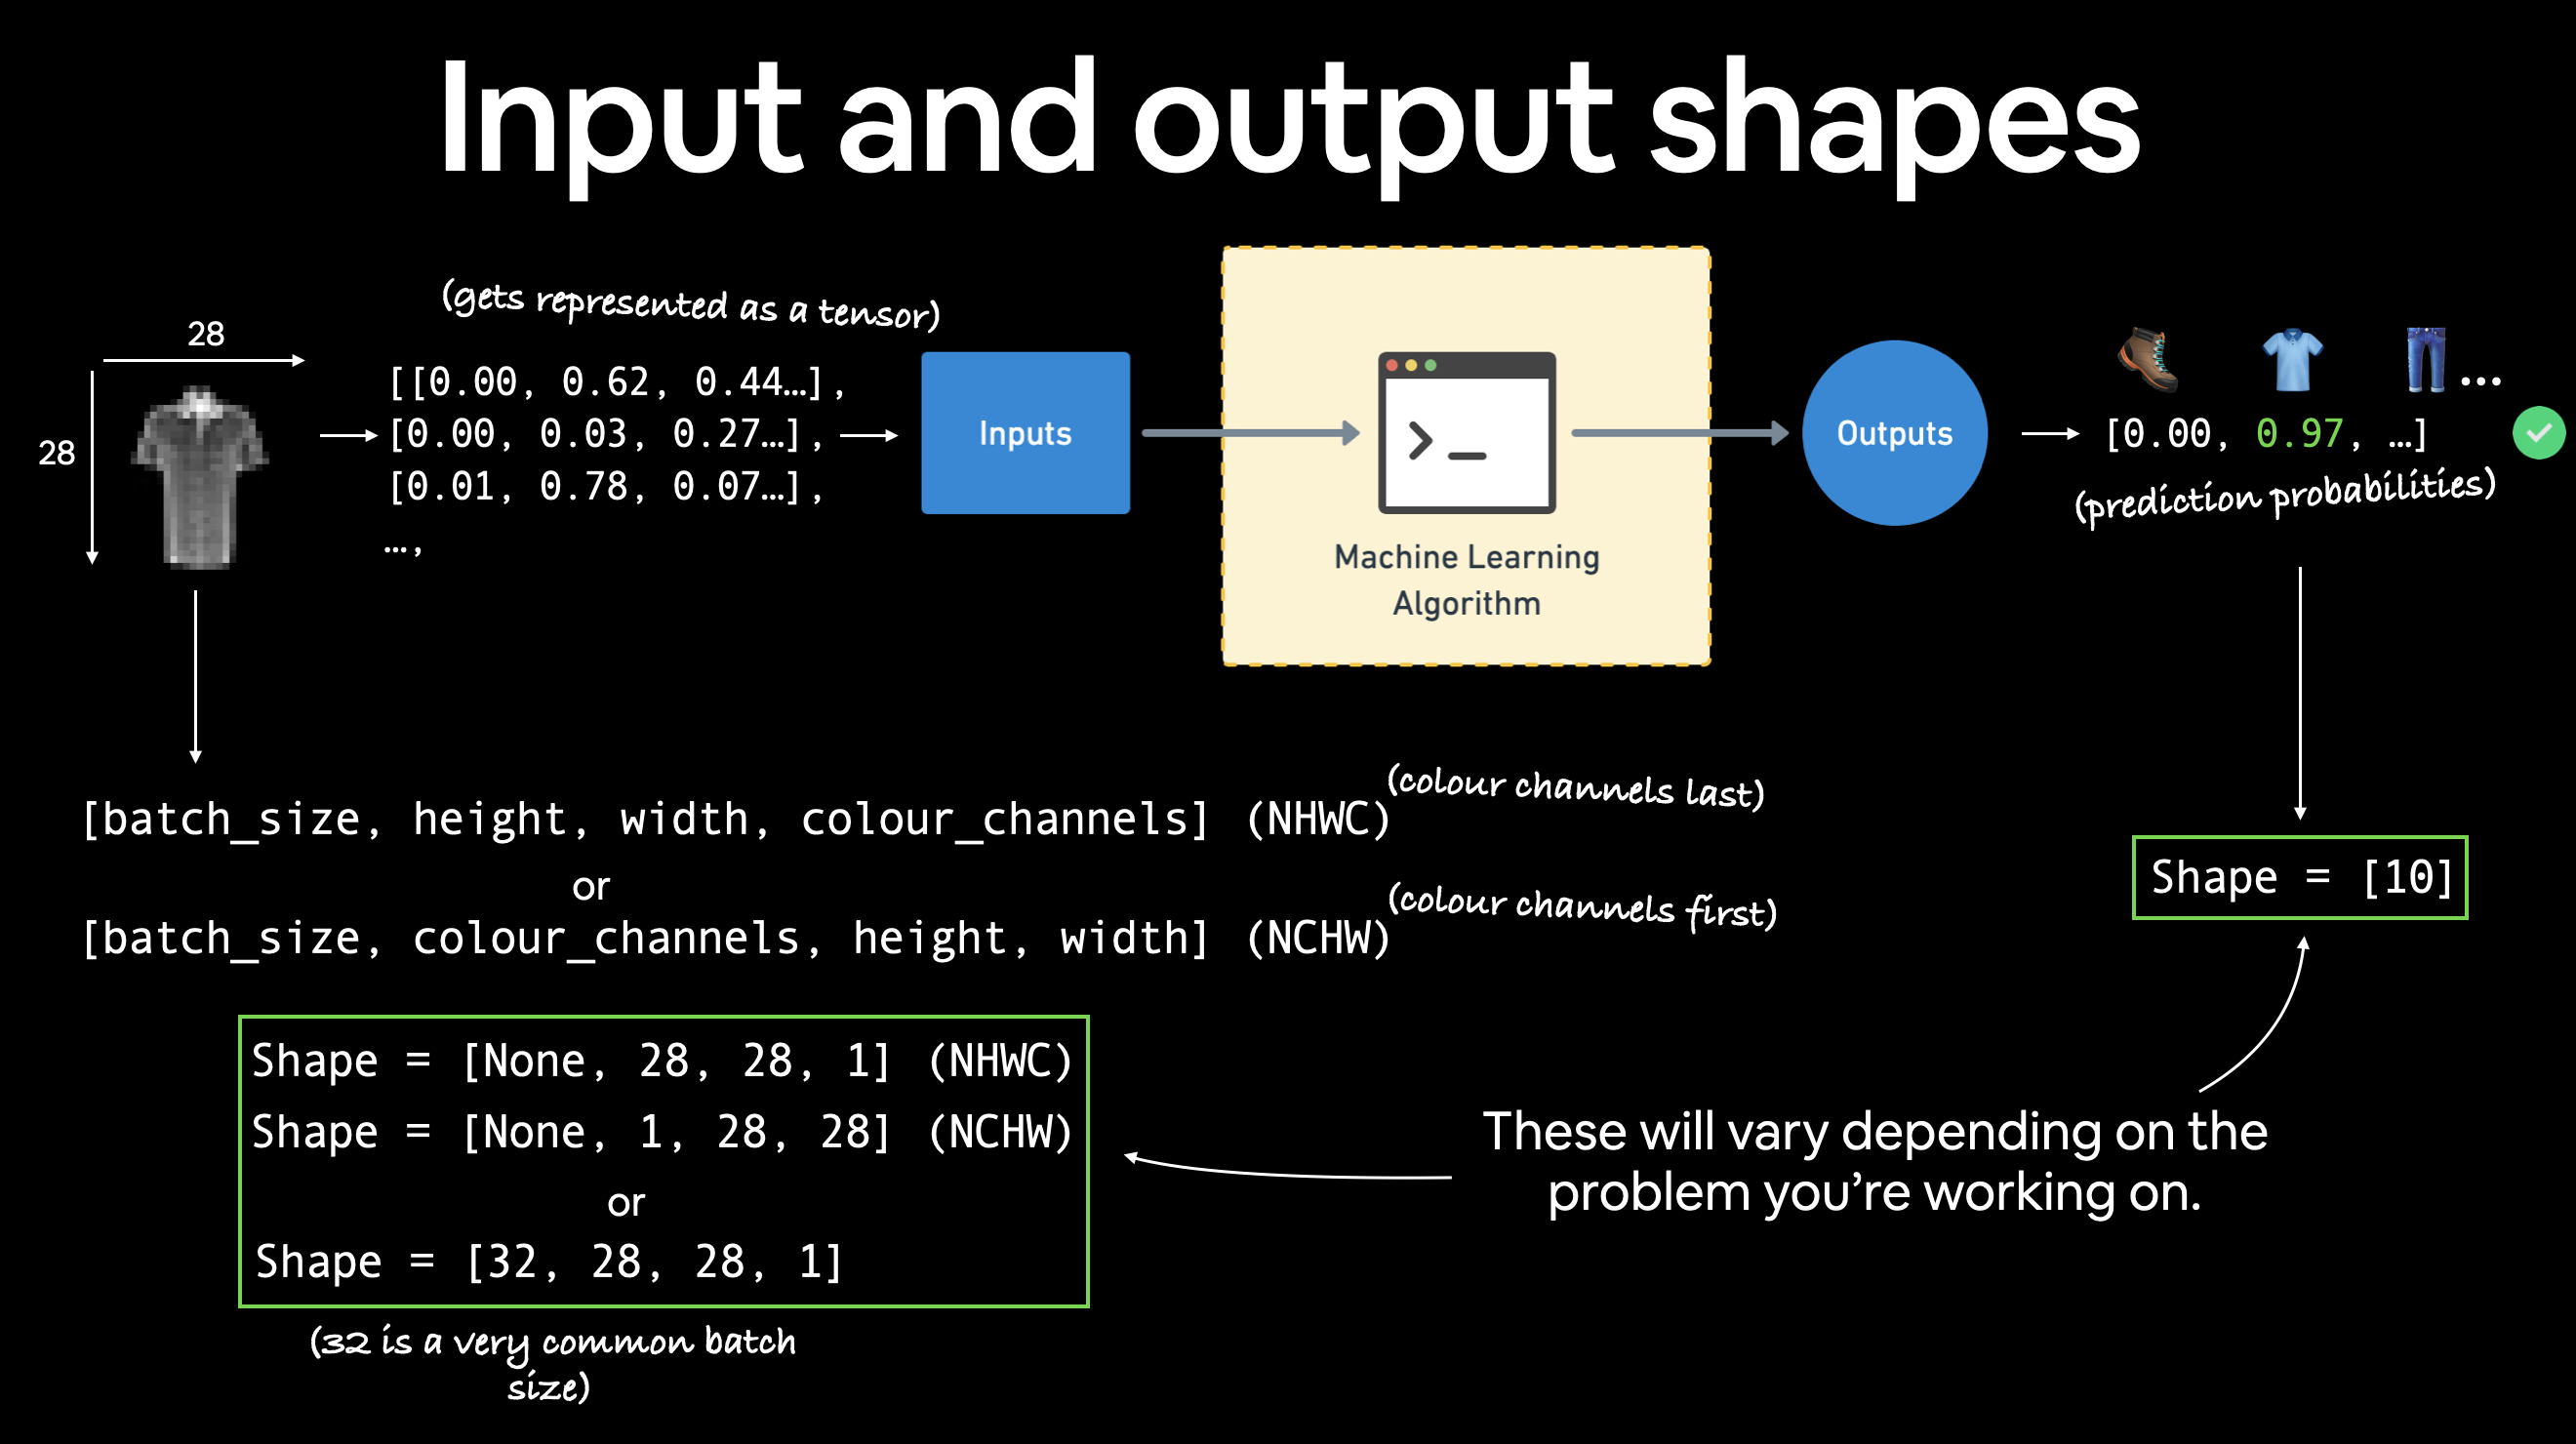

In [6]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png"
Image(image_url, width=800, height=400)


In [7]:
# Get the number of training and test samples
print(f"Number of training samples: {len(train_set)}")
print(f"Number of test samples: {len(test_set)}")

# Get the number of classes
print(f"Number of classes: {len(train_set.classes)}")

# Get the name of classes
print(f"Classes: {train_set.classes}")


Number of training samples: 60000
Number of test samples: 10000
Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### Visualizing the Dataset

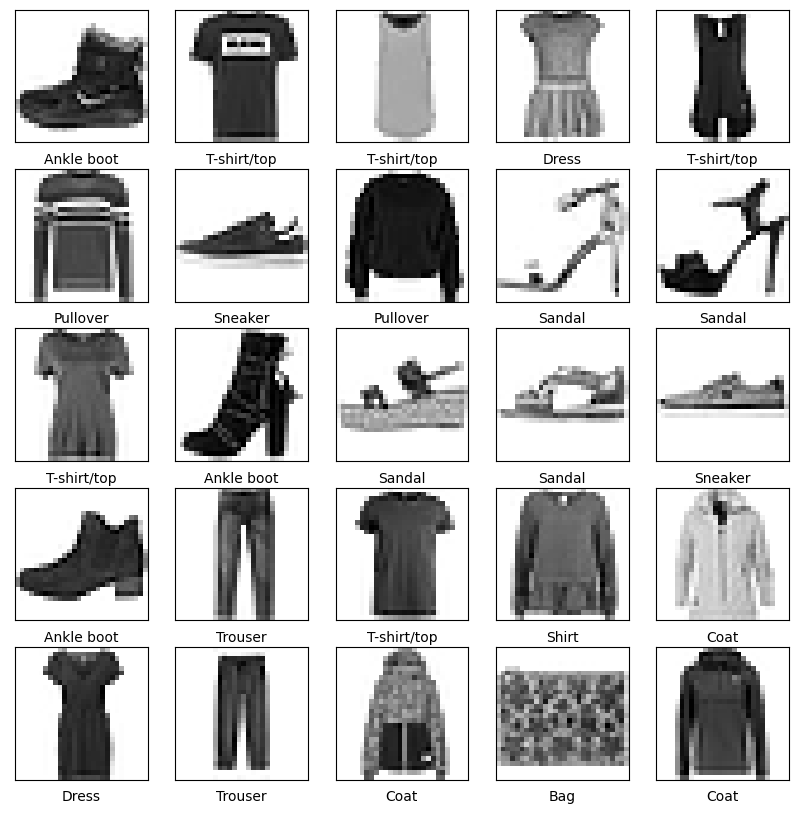

In [8]:
# get the samples of the training set
train_samples = train_set.data
x_train = train_samples.float() / 255.0

y_train = train_set.targets

# Visualize a few samples of the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(train_set.classes[y_train[i]])


#### Prepare DataLoader

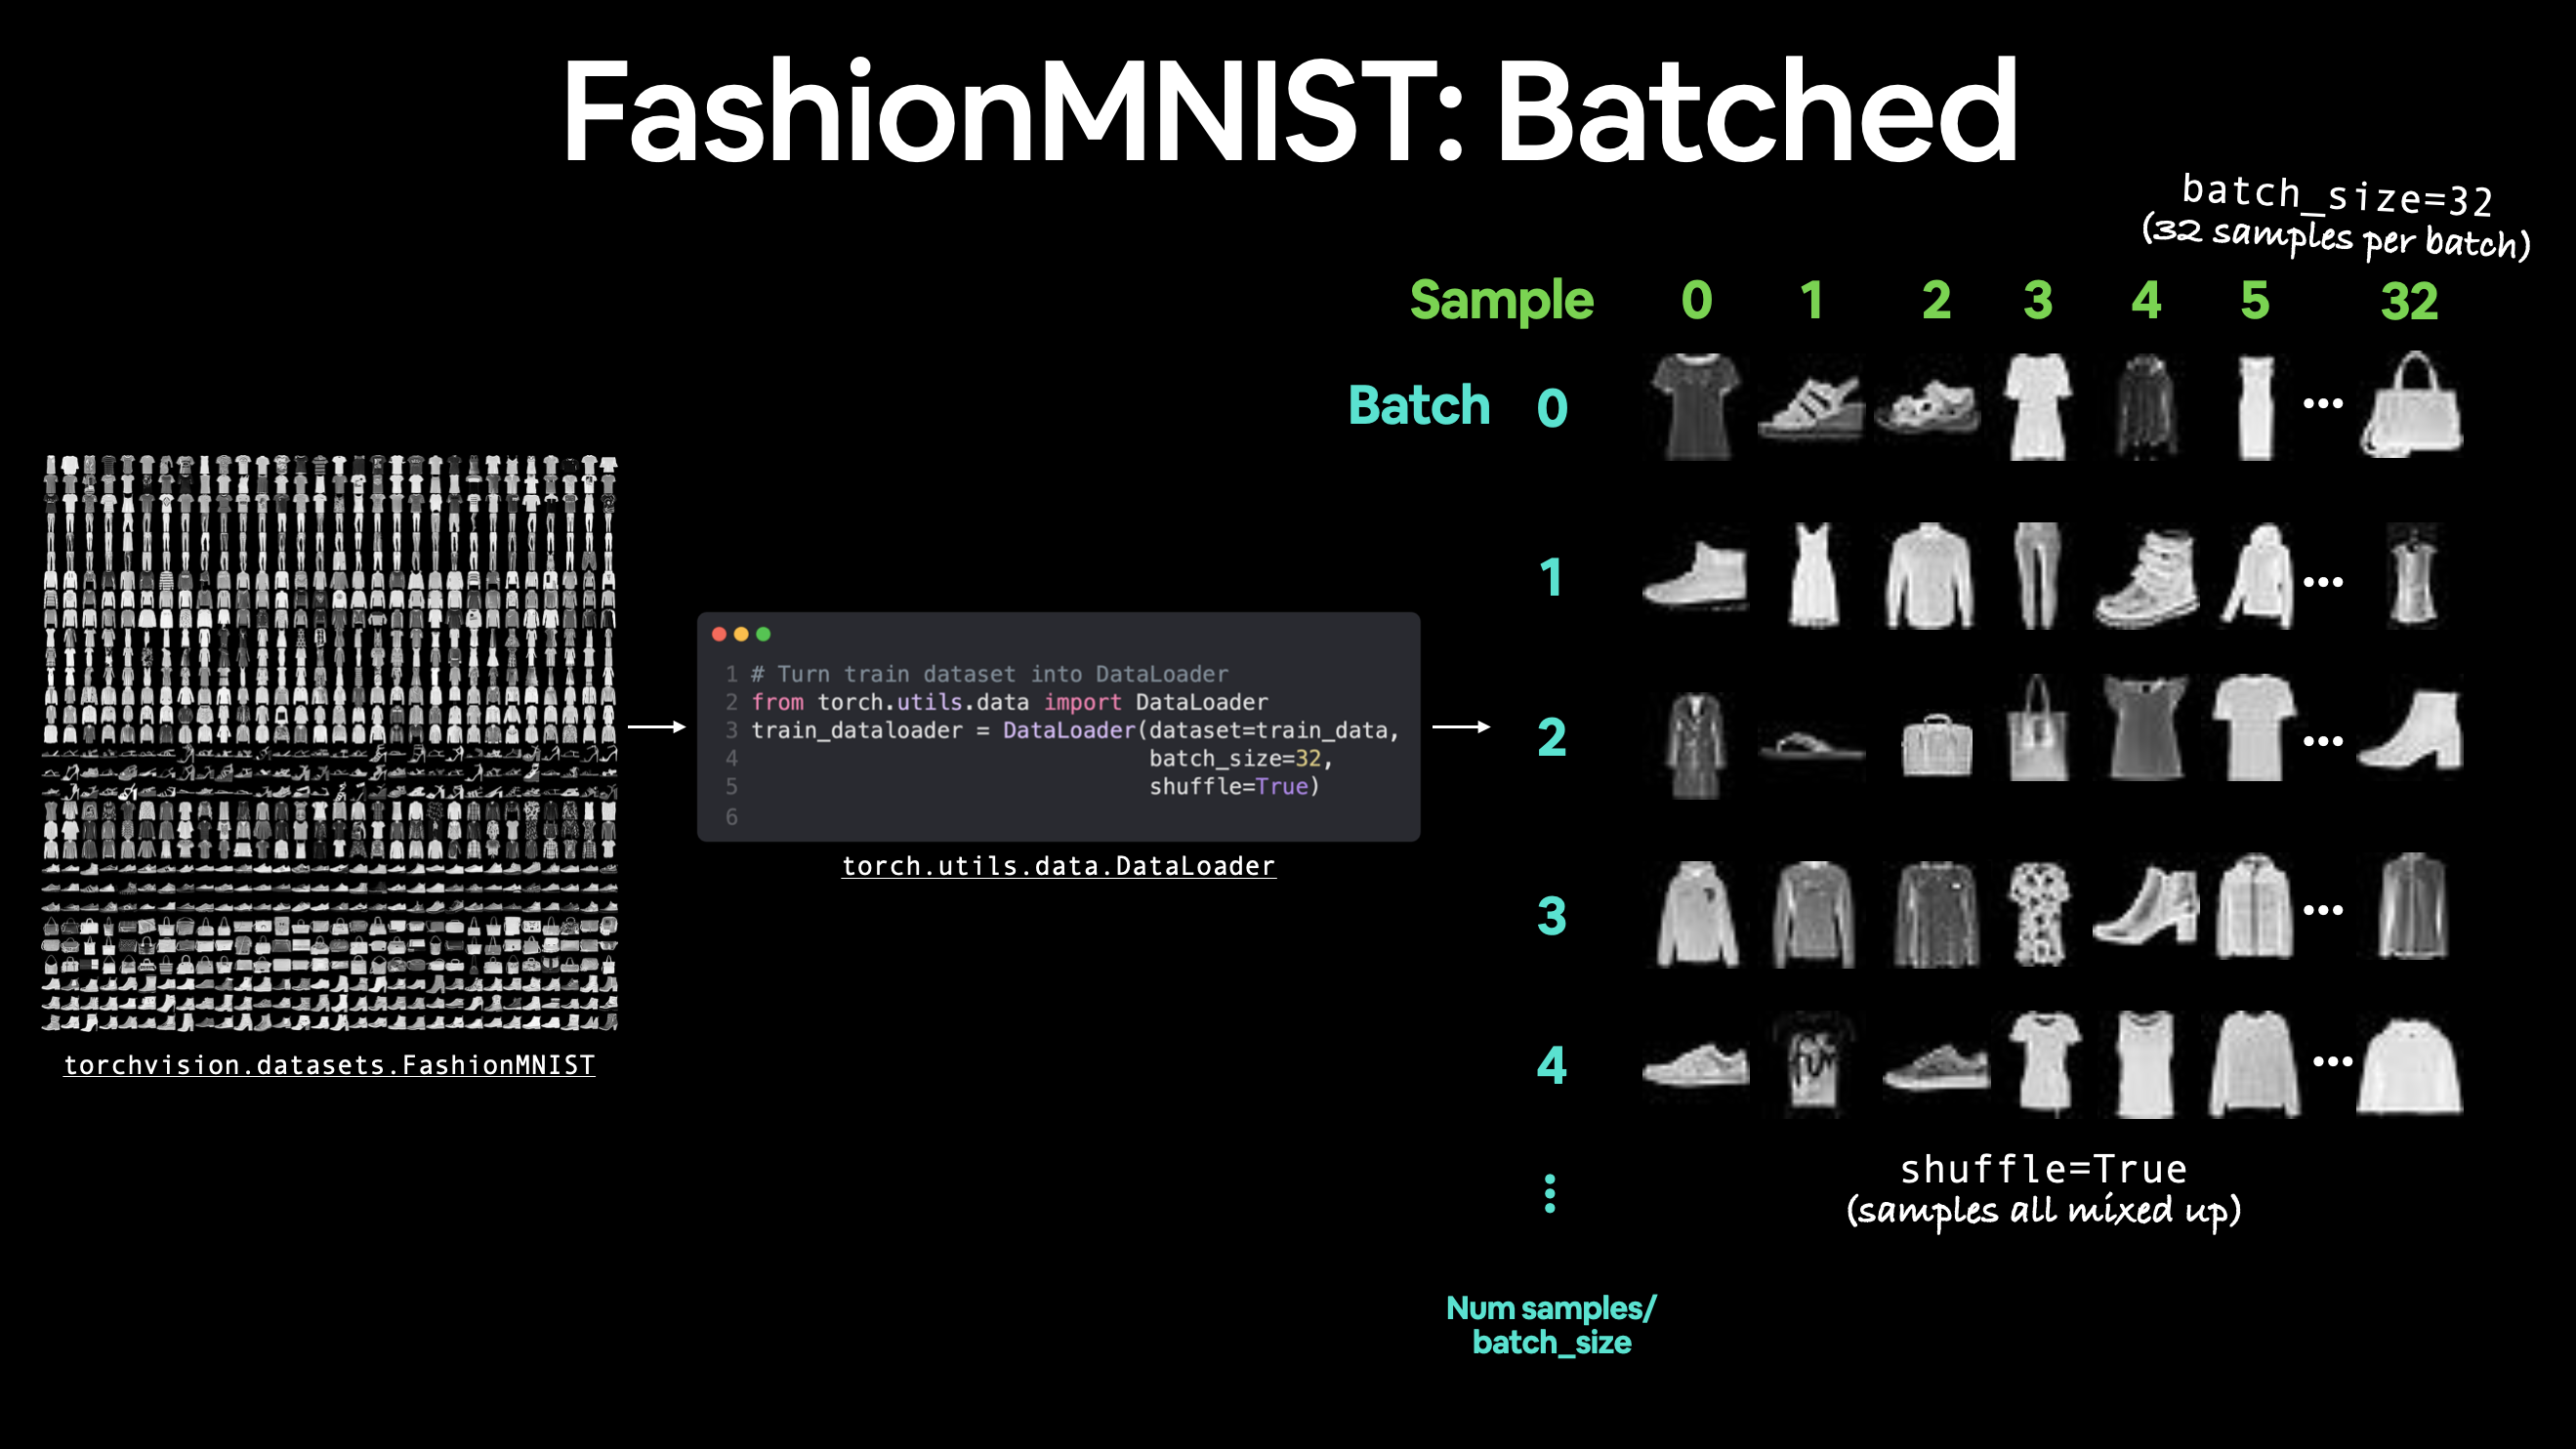

In [9]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png"
Image(image_url, width=800, height=400)


In [10]:
# Create data loader
batch_size = 32
train_loader = th.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)
test_loader = th.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=True)


# Check the dataloaders
print(f"Training loader: {train_loader}")
print(f"Test loader: {test_loader}")


# Check the number of batches
print(f"Number of batches in training set: {len(train_loader)}")
print(f"Number of batches in test set: {len(test_loader)}")


Training loader: <torch.utils.data.dataloader.DataLoader object at 0x7f4d8995b5b0>
Test loader: <torch.utils.data.dataloader.DataLoader object at 0x7f4d8995b610>
Number of batches in training set: 1875
Number of batches in test set: 313


In [11]:
# Check out what's inside the training dataloader
train_loader_iter = iter(train_loader)
train_features, train_labels = next(train_loader_iter)
print(f"train feature batch shape: {train_features.shape}")
print(f"train label batch shape: {train_labels.shape}")

# Check out what's inside the test dataloader
test_loader_iter = iter(test_loader)
test_features, test_labels = next(test_loader_iter)
print(f"test feature batch shape: {test_features.shape}")
print(f"test label batch shape: {test_labels.shape}")


train feature batch shape: torch.Size([32, 1, 28, 28])
train label batch shape: torch.Size([32])
test feature batch shape: torch.Size([32, 1, 28, 28])
test label batch shape: torch.Size([32])


#### Build a Baseline Model

In [12]:
# Create a flatten layer
# all nn modules function as a model (can do a forward pass)
flatten_model = th.nn.Flatten()

# Get a batch of training data
train_features, train_labels = next(train_loader_iter)

# Flatten the sample
output = flatten_model(train_features[0])  # get the output of the model

# Print out what happened
print(
    f"Shape before flattening: {train_features[0].shape} -> [color_channels, height, width]")
print(
    f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [13]:
# Create 4d torch random tensor
tensor_4d = th.rand(1, 1, 28, 28)
print(f"Shape of 4d tensor: {tensor_4d.shape}")

# Flatten the tensor
output = flatten_model(tensor_4d)
print(f"Shape after flattening: {output.shape}")

# Create 3d torch random tensor
tensor_3d = th.rand(1, 28, 28)
print(f"Shape of 3d tensor: {tensor_3d.shape}")

# Flatten the tensor
output = flatten_model(tensor_3d)
print(f"Shape after flattening: {output.shape}")


Shape of 4d tensor: torch.Size([1, 1, 28, 28])
Shape after flattening: torch.Size([1, 784])
Shape of 3d tensor: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [14]:
# Create a model

class FlattenModel(th.nn.Module):
    def __init__(self):
        super().__init__()
        layers = [
            th.nn.Flatten(),
            th.nn.Linear(28*28, 512),
            th.nn.ELU(),
            th.nn.Linear(512, 128),
            th.nn.ReLU(),
            th.nn.Linear(128, 32),
            th.nn.ReLU(),
            th.nn.Linear(32, 10)
        ]

        self.layers = th.nn.Sequential(*layers)

    def forward(self, inputs):
        return self.layers(inputs)


In [15]:
# Set fixed random seed
th.manual_seed(42)


In [16]:
# Set the device
device = th.device("cuda" if th.cuda.is_available() else "cpu")
print(f"Using {device} device")


Using cpu device


In [17]:
# Create an instance of the model
model = FlattenModel().to(device)

# Create a loss function
loss_fn = th.nn.CrossEntropyLoss()

# Create an optimizer
optimizer = th.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Create a metric
metric_fn = tm.Accuracy(task="multiclass", num_classes=10)


In [18]:
# Create the training and evaluaating loop
def train_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer, metric_fn, num_epochs=50):
    """
    Train a model on a training set and evaluate it on a test set.

    Args:
        train_dataloader (th.utils.data.DataLoader): Training dataloader
        test_dataloader (th.utils.data.DataLoader): Test dataloader
        model (th.nn.Module): Model to train
        loss_fn (th.nn.Module): Loss function
        optimizer (th.optim.Optimizer): Optimizer to use
        metric_fn (th.nn.Module): Metric function
        num_epochs (int, optional): Number of epochs to train for. Defaults to 50.
    """
    # Get the number of epochs to train for
    epochs = num_epochs

    # Train the model
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch+1}/{epochs}")
        print("-"*10)

        # Train the model
        model.train()

        train_loss = 0
        train_metric = 0

        for _, (X, y) in enumerate(train_dataloader):
            # Move data to device
            X = X.to(device)
            y = y.to(device)

            # Make predictions
            y_pred = model(X).softmax(dim=1)

            # Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()

            # Calculate metric
            metric = metric_fn(y_pred, y)
            train_metric += metric.item()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate the model
        model.eval()

        test_loss = 0
        test_metric = 0

        with th.inference_mode():
            for X, y in test_dataloader:
                # Move data to device
                X = X.to(device)
                y = y.to(device)

                # Make predictions
                y_pred = model(X).softmax(dim=1)

                # Calculate loss
                loss = loss_fn(y_pred, y)
                test_loss += loss.item()

                # Calculate metric
                metric = metric_fn(y_pred, y)
                test_metric += metric.item()

        # Calculate the average loss and metric
        train_loss /= len(train_dataloader)
        train_metric /= len(train_dataloader)
        test_loss /= len(test_dataloader)
        test_metric /= len(test_dataloader)

        # Print the results
        print(
            f"Train loss: {train_loss:.4f} | Train metric: {train_metric:.4f}")
        print(f"Test loss: {test_loss:.4f} | Test metric: {test_metric:.4f}")

        return model, train_loss, train_metric, test_loss, test_metric


In [19]:
# Fitting the model
model, train_loss, train_metric, test_loss, test_metric = train_loop(train_loader, test_loader, model, loss_fn, optimizer, metric_fn, num_epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50
----------
Train loss: 1.7263 | Train metric: 0.7367
Test loss: 1.6511 | Test metric: 0.8092


In [20]:
# Save the model
th.save(model.state_dict(), "./models/model_FashionMINIST.pth")

# Load the model
loaded_model = FlattenModel().to(device)
loaded_model.load_state_dict(th.load("./models/model_FashionMINIST.pth"))

# Make predictions with the model
with th.inference_mode():
    for X, y in test_loader:
        # Move data to device
        X = X.to(device)
        y = y.to(device)

        # Make predictions
        y_pred = loaded_model(X).softmax(dim=1)

        # Get the predicted class
        y_pred_class = th.argmax(y_pred, dim=1)

        # Print the results
        print(f"Predicted: {y_pred_class}")
        print(f"Actual: {y}")


Predicted: tensor([9, 1, 0, 9, 1, 2, 4, 9, 4, 4, 1, 3, 1, 0, 7, 8, 1, 2, 9, 0, 1, 7, 3, 0,
        6, 2, 2, 9, 0, 7, 3, 2])
Actual: tensor([9, 1, 0, 9, 1, 2, 2, 9, 4, 6, 1, 3, 1, 0, 7, 8, 1, 2, 9, 6, 1, 7, 3, 0,
        6, 4, 2, 9, 0, 9, 3, 2])
Predicted: tensor([4, 5, 4, 4, 5, 8, 3, 7, 8, 1, 7, 3, 8, 9, 6, 2, 1, 2, 7, 1, 9, 8, 5, 1,
        3, 1, 6, 6, 3, 8, 1, 6])
Actual: tensor([4, 5, 4, 6, 5, 8, 0, 9, 8, 1, 7, 3, 8, 9, 6, 2, 1, 2, 7, 1, 7, 8, 5, 1,
        3, 1, 6, 4, 3, 8, 1, 2])
Predicted: tensor([4, 8, 9, 3, 1, 2, 3, 3, 7, 8, 2, 4, 8, 4, 7, 9, 9, 5, 4, 1, 8, 0, 0, 2,
        0, 2, 5, 3, 9, 7, 3, 7])
Actual: tensor([4, 8, 9, 3, 1, 2, 3, 3, 7, 8, 2, 4, 8, 4, 9, 9, 9, 5, 4, 1, 8, 0, 0, 2,
        0, 2, 5, 3, 9, 7, 3, 7])
Predicted: tensor([5, 1, 2, 3, 4, 9, 6, 1, 4, 0, 3, 3, 3, 3, 8, 4, 6, 0, 8, 9, 9, 9, 5, 2,
        1, 7, 7, 1, 7, 2, 4, 0])
Actual: tensor([5, 1, 4, 3, 2, 7, 6, 1, 4, 0, 3, 3, 8, 3, 8, 2, 6, 0, 6, 9, 9, 9, 5, 2,
        1, 7, 7, 1, 7, 2, 6, 0])
Predicted: tensor([7

In [26]:
y_pred = loaded_model(test_features).softmax(dim=1)
pprint(y_pred)
metric_fn(y_pred, test_labels)


tensor([[9.1985e-14, 4.0169e-17, 7.3022e-18, 4.8726e-14, 1.0842e-19, 5.5619e-14,
         5.2937e-22, 8.1145e-09, 3.9257e-12, 1.0000e+00],
        [1.4269e-10, 1.6815e-16, 2.6223e-08, 2.2810e-14, 1.8791e-01, 8.2036e-16,
         8.1131e-01, 1.0645e-17, 7.7995e-04, 7.1378e-15],
        [2.3943e-05, 1.0476e-06, 1.0946e-06, 1.3605e-05, 4.6153e-07, 5.7371e-01,
         5.9581e-07, 4.2204e-01, 4.2171e-03, 8.9363e-10],
        [9.9933e-01, 6.4822e-20, 6.7400e-04, 3.1352e-09, 1.6044e-13, 2.4074e-08,
         1.2809e-09, 8.0721e-20, 2.0961e-12, 6.2625e-15],
        [1.6841e-18, 9.9998e-01, 2.9250e-16, 1.5929e-05, 1.0858e-07, 5.3783e-13,
         2.4778e-20, 6.7507e-10, 2.3670e-09, 3.2748e-11],
        [7.5258e-09, 6.6118e-10, 1.5046e-06, 2.9274e-08, 2.4309e-10, 1.0000e+00,
         1.8540e-11, 6.8942e-08, 3.7264e-08, 2.6234e-11],
        [1.2457e-14, 2.7725e-14, 9.6370e-19, 3.9080e-13, 4.5600e-19, 5.5067e-11,
         1.0448e-20, 1.0000e+00, 3.8521e-11, 2.0573e-10],
        [3.8331e-09, 4.4558

tensor(0.8125)

####  Building a Convolutional Neural Network (CNN)

In [103]:
# Create Convolutional Neural Network
class ConvNet(th.nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = th.nn.Sequential(
            th.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            th.nn.ReLU(),
            th.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            th.nn.ReLU(),
            th.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = th.nn.Sequential(
            th.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            th.nn.ReLU(),
            th.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            th.nn.ReLU(),
            th.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = th.nn.Sequential(
            th.nn.Flatten(),
            th.nn.Linear(128*7*7, 1024),
            th.nn.ReLU(),
            th.nn.Linear(1024, 32),
            th.nn.ReLU(),
            th.nn.Linear(32, 10)
        )

    def forward(self, x) -> th.Tensor:
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x


In [104]:
# Create an instane of the model
cnn_model = ConvNet().to(device)

# Print the model
print(cnn_model)
print(cnn_model.parameters())
print(cnn_model.state_dict())

ConvNet(
  (block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)
<generator object Module.parameters at 0x7f4d7a91bf40>
OrderedDict([('block1.0.weight', tensor([[[[ 0.1077,  

##### Understanding CNNs Hyperparamters

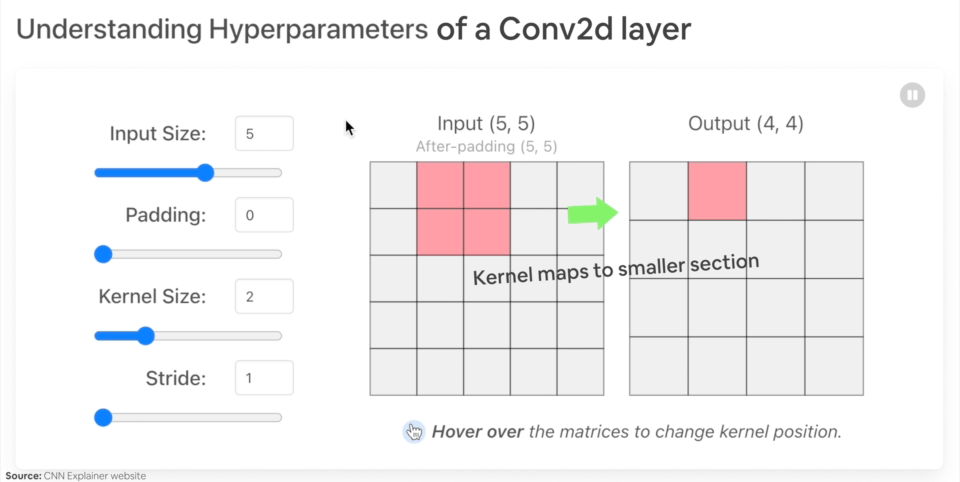

In [105]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif"
Image(image_url, width=800, height=400)

In [106]:
# Playing with Conv2d in pyotrch

# Set the random seed for both the sample images and Conv2d initial weights
th.manual_seed(42)

# Create an image
test_images = th.randn(32, 3, 64, 64)
test_image = test_images[0]

print(f"Image batch shape: {test_images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [107]:
conv_layer = th.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
# Get shapes of weight and bias tensors within conv_layer
print(f"conv_layer_2 weight shape: \n{conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer.bias.shape} -> [out_channels=10]")
print(conv_layer(test_image).shape)

conv_layer_1 = th.nn.Conv2d(3, 32, kernel_size=(5,5), stride=1, padding=2)
# Get shapes of weight and bias tensors within conv_layer_1
print(f"conv_layer_2 weight shape: \n{conv_layer_1.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_1.bias.shape} -> [out_channels=10]")
print(conv_layer_1(test_image).shape)

conv_layer_2 weight shape: 
torch.Size([16, 3, 3, 3]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([16]) -> [out_channels=10]
torch.Size([16, 64, 64])
conv_layer_2 weight shape: 
torch.Size([32, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([32]) -> [out_channels=10]
torch.Size([32, 64, 64])


In [108]:
# Playing wiht MaxPool2d in pyotrch

# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = th.nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 16, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 16, 32, 32])


In [109]:
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = th.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = th.nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[-0.4088,  0.0982],
          [ 0.3908, -1.2341]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3908]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


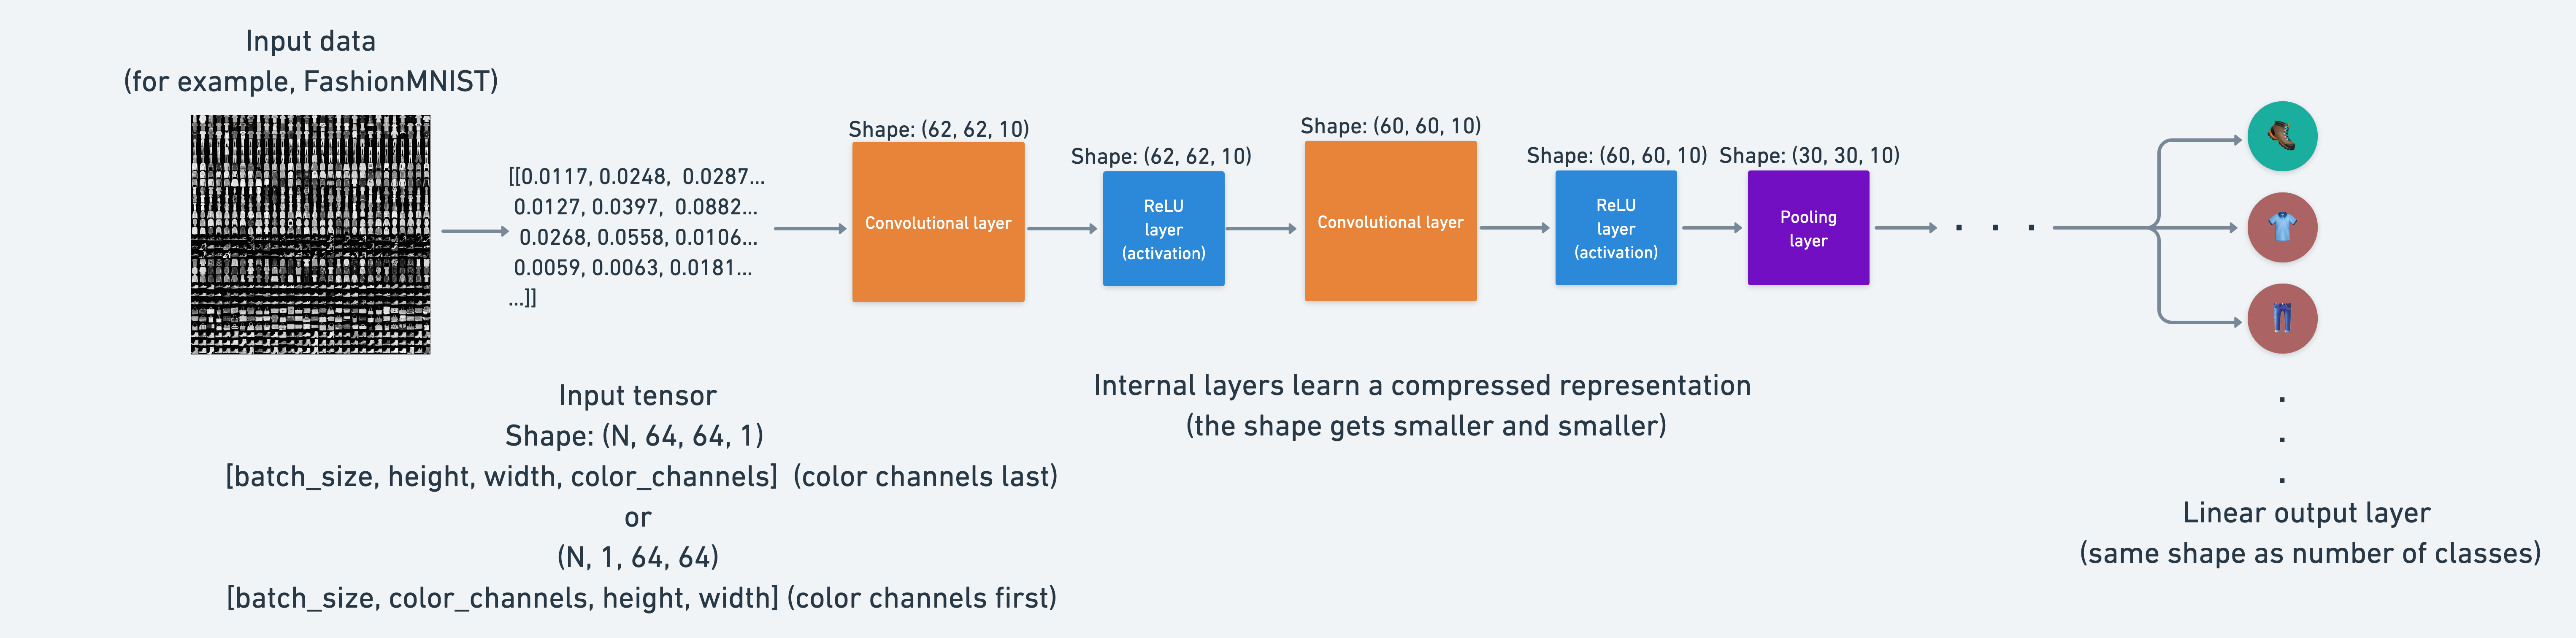

In [110]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png"
Image(image_url, width=800, height=800)

In [111]:
# Create an instance of the model
cnn_model = ConvNet().to(device)

# Create a loss function
loss_fn = th.nn.CrossEntropyLoss()

# Create an optimizer
optimizer = th.optim.Adam(cnn_model.parameters(), lr=1e-3, weight_decay=1e-5)

# Create a metric function
metric_fn = tm.Accuracy(task="multiclass", num_classes=10)

# Create a learning rate scheduler
scheduler = th.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [112]:
# Fitting the model
model, train_loss, train_metric, test_loss, test_metric = train_loop(train_loader, test_loader, cnn_model, loss_fn, optimizer, metric_fn, num_epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50
----------
Train loss: 1.8131 | Train metric: 0.6474
Test loss: 1.6905 | Test metric: 0.7704


##### Plot Predictions

Predictions:
tensor([2, 9, 9, 7, 2, 8, 8, 5, 9, 8, 9, 0, 2, 4, 1, 9, 3, 4, 2, 3, 2, 7, 3, 5,
        4, 2, 0, 1, 2, 8, 7, 1])
Labels:
tensor([2, 9, 9, 5, 2, 8, 8, 5, 9, 2, 9, 6, 2, 6, 1, 9, 1, 6, 2, 3, 2, 7, 3, 5,
        4, 2, 0, 1, 6, 8, 7, 1])


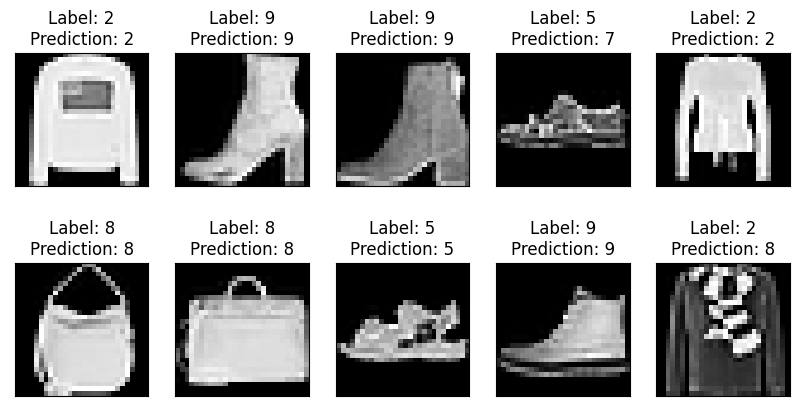

In [113]:
# Plot predictions for the first 10 images in the test set

# Sample 10 first images and labels form test_loader
images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

# Get predictions for the first 10 images
predictions = cnn_model(images).argmax(dim=1)
print(f"Predictions:\n{predictions}")
print(f"Labels:\n{labels}")

# Plot the first 10 images and their labels and predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(th.permute(images[i], (1, 2, 0)), cmap = "gray")
    plt.title(f"Label: {labels[i]}\nPrediction: {predictions[i]}")
    plt.xticks([])
    plt.yticks([])

##### Making the Confusion Matrix

In [114]:
# Evalute the model for data in test_loader
y_test_preds = []
cnn_model.eval()
for images, labels in tqdm(test_loader):
    images = images.to(device)
    labels = labels.to(device)
    y_test_preds.append(cnn_model(images).softmax(dim=1).argmax(dim=1))

y_preds_tensor = th.cat(y_test_preds, dim=0)
labels_tensor = test_loader.dataset.targets

# Setup confusion matrix instance and compare predictions to targets
confusion_matrix = tm.ConfusionMatrix(task="multiclass", num_classes=10, )
confmat_tensor = confusion_matrix(y_preds_tensor, labels_tensor)

  0%|          | 0/313 [00:00<?, ?it/s]

Confusion matrix:
tensor([[113, 111, 150,  83, 138, 103,   0,  74, 108, 120],
        [115, 111, 174,  82, 114, 107,   0,  93, 114,  90],
        [105, 112, 168,  84, 114, 120,   0,  79, 111, 107],
        [118, 111, 153, 103, 101, 118,   0,  85, 104, 107],
        [106, 139, 156, 102, 120, 104,   0,  76,  97, 100],
        [107, 108, 158,  98, 114, 102,   0,  78, 117, 118],
        [104,  92, 199,  99, 107, 100,   0,  85, 107, 107],
        [113, 120, 160,  93, 107,  98,   0,  94, 111, 104],
        [122,  99, 140,  99, 120, 103,   0, 101, 102, 114],
        [110, 107, 143,  87, 123,  99,   0,  98, 101, 132]])


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

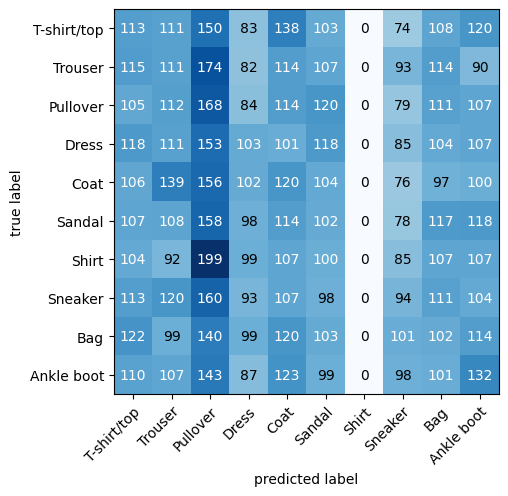

In [115]:
# Plot the confustion matrix with mlxtend plot_confusion_matrix function
print(f"Confusion matrix:\n{confmat_tensor}")
plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names= test_loader.dataset.classes, figsize=(5,5))

In [116]:
test_loader.dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']